In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_excel('Data-United flights-u.xls')

# Display the first few rows of the dataset
import re
import warnings

import pandas as pd
import numpy as np

import plotly.express as px
from plotly.offline import init_notebook_mode, iplot

import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS # generate wordcloud
from bs4 import BeautifulSoup # clean html texts
from IPython.display import Markdown, display

def printmd(string):
    display(Markdown(string))



warnings. filterwarnings('ignore')


pd.set_option('display.max_column', None)
pd.set_option('display.max_colwidth', 60)
# pd.set_option("display.max_colwidth", -1)

init_notebook_mode(connected=True) # to display plotly graph offline

%matplotlib inline

WARNING *** File is truncated, or OLE2 MSAT is corrupt!!
INFO: Trying to access sector 9116 but only 2047 available


IndexError: array index out of range

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25777 entries, 0 to 25776
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Day_of_Month     25777 non-null  int64  
 1   Month            25777 non-null  int64  
 2   year             25777 non-null  int64  
 3   Airline          25777 non-null  object 
 4   Origin           25777 non-null  object 
 5   Destination      25777 non-null  object 
 6   Departure_Delay  23576 non-null  float64
 7   Arrival_Delay    23576 non-null  float64
 8   Cancelled        25777 non-null  int64  
 9   Rain_at_Origin   25777 non-null  int64  
 10  Rain_at_Dest     25777 non-null  int64  
 11  Incentive_Pay    25777 non-null  int64  
 12  Time_in_Air      23576 non-null  float64
dtypes: float64(3), int64(7), object(3)
memory usage: 2.6+ MB


In [ ]:
df.dtypes

Day_of_Month         int64
Month                int64
year                 int64
Airline             object
Origin              object
Destination         object
Departure_Delay    float64
Arrival_Delay      float64
Cancelled            int64
Rain_at_Origin       int64
Rain_at_Dest         int64
Incentive_Pay        int64
Time_in_Air        float64
dtype: object

In [ ]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# Handling missing values
# For demonstration purposes, let's fill missing values in numeric columns with their mean
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [ ]:
# For non-numeric columns, you might want to drop or impute missing values based on domain knowledge

# Check for missing values after cleaning
print("Missing values after cleaning:")
print(df.isnull().sum())

Missing values after cleaning:
Day_of_Month       0
Month              0
year               0
Airline            0
Origin             0
Destination        0
Departure_Delay    0
Arrival_Delay      0
Cancelled          0
Rain_at_Origin     0
Rain_at_Dest       0
Incentive_Pay      0
Time_in_Air        0
dtype: int64


In [ ]:
# Save the cleaned dataset
df.to_excel('cleaned_data.xlsx', index=False)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel('Data-United flights-u.xls')

# Drop non-numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Display the first few rows of the dataset
print(numeric_df.head())

   Day_of_Month  Month  year  Departure_Delay  Arrival_Delay  Cancelled  \
0             9      8  2012              0.0            1.0          0   
1            11      2  2012              0.0            5.0          0   
2            31      5  2012              NaN            NaN          1   
3            24      3  2012              1.0           -2.0          0   
4            15      3  2012              0.0            7.0          0   

   Rain_at_Origin  Rain_at_Dest  Incentive_Pay  Time_in_Air  
0               0             0              0         60.0  
1               1             0              0        226.0  
2               0             0              0          NaN  
3               0             0              0        113.0  
4               0             0              0         53.0  


In [ ]:
# Summary statistics
print(numeric_df.describe())


       Day_of_Month         Month     year  Departure_Delay  Arrival_Delay  \
count  25777.000000  25777.000000  25777.0     23576.000000   23576.000000   
mean      15.813904      6.277612   2012.0        18.422464      19.004920   
std        8.759504      3.400324      0.0        37.831523      43.182731   
min        1.000000      1.000000   2012.0        -2.000000     -60.000000   
25%        8.000000      3.000000   2012.0         0.000000      -6.000000   
50%       16.000000      6.000000   2012.0         2.000000       6.000000   
75%       23.000000      9.000000   2012.0        19.000000      27.000000   
max       31.000000     12.000000   2012.0       513.000000     527.000000   

          Cancelled  Rain_at_Origin  Rain_at_Dest  Incentive_Pay   Time_in_Air  
count  25777.000000    25777.000000  25777.000000   25777.000000  23576.000000  
mean       0.085386        0.228498      0.219071       0.228033    157.981888  
std        0.279461        0.419873      0.413625     

In [ ]:
# Summary statistics
print(numeric_df.describe())
# Check for missing values
print(numeric_df.isnull().sum())

       Day_of_Month         Month     year  Departure_Delay  Arrival_Delay  \
count  25777.000000  25777.000000  25777.0     23576.000000   23576.000000   
mean      15.813904      6.277612   2012.0        18.422464      19.004920   
std        8.759504      3.400324      0.0        37.831523      43.182731   
min        1.000000      1.000000   2012.0        -2.000000     -60.000000   
25%        8.000000      3.000000   2012.0         0.000000      -6.000000   
50%       16.000000      6.000000   2012.0         2.000000       6.000000   
75%       23.000000      9.000000   2012.0        19.000000      27.000000   
max       31.000000     12.000000   2012.0       513.000000     527.000000   

          Cancelled  Rain_at_Origin  Rain_at_Dest  Incentive_Pay   Time_in_Air  
count  25777.000000    25777.000000  25777.000000   25777.000000  23576.000000  
mean       0.085386        0.228498      0.219071       0.228033    157.981888  
std        0.279461        0.419873      0.413625     

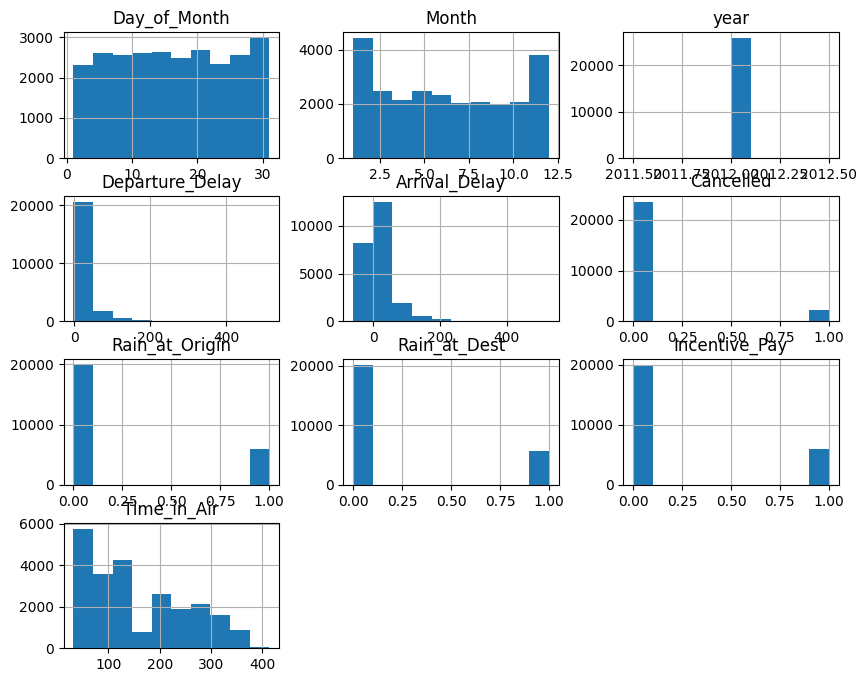

In [ ]:
# Histogram of numerical variables
numeric_df.hist(figsize=(10, 8))
plt.show()


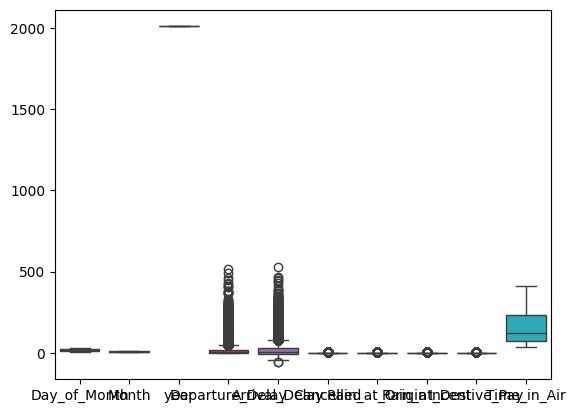

In [ ]:
# Boxplot of numerical variables
sns.boxplot(data=numeric_df)
plt.show()

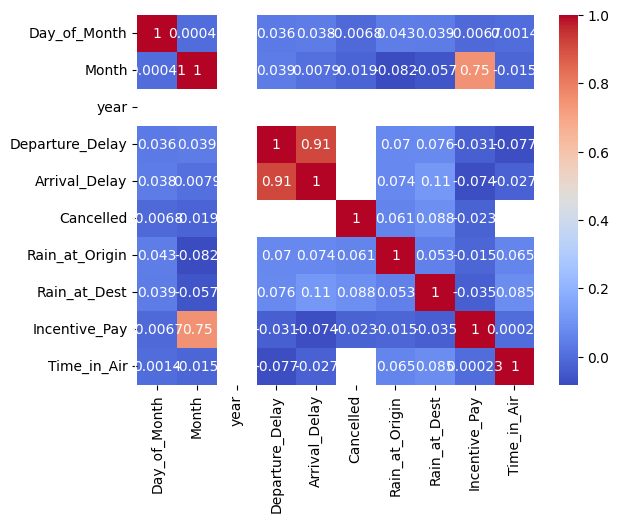

In [ ]:
# Correlation heatmap
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

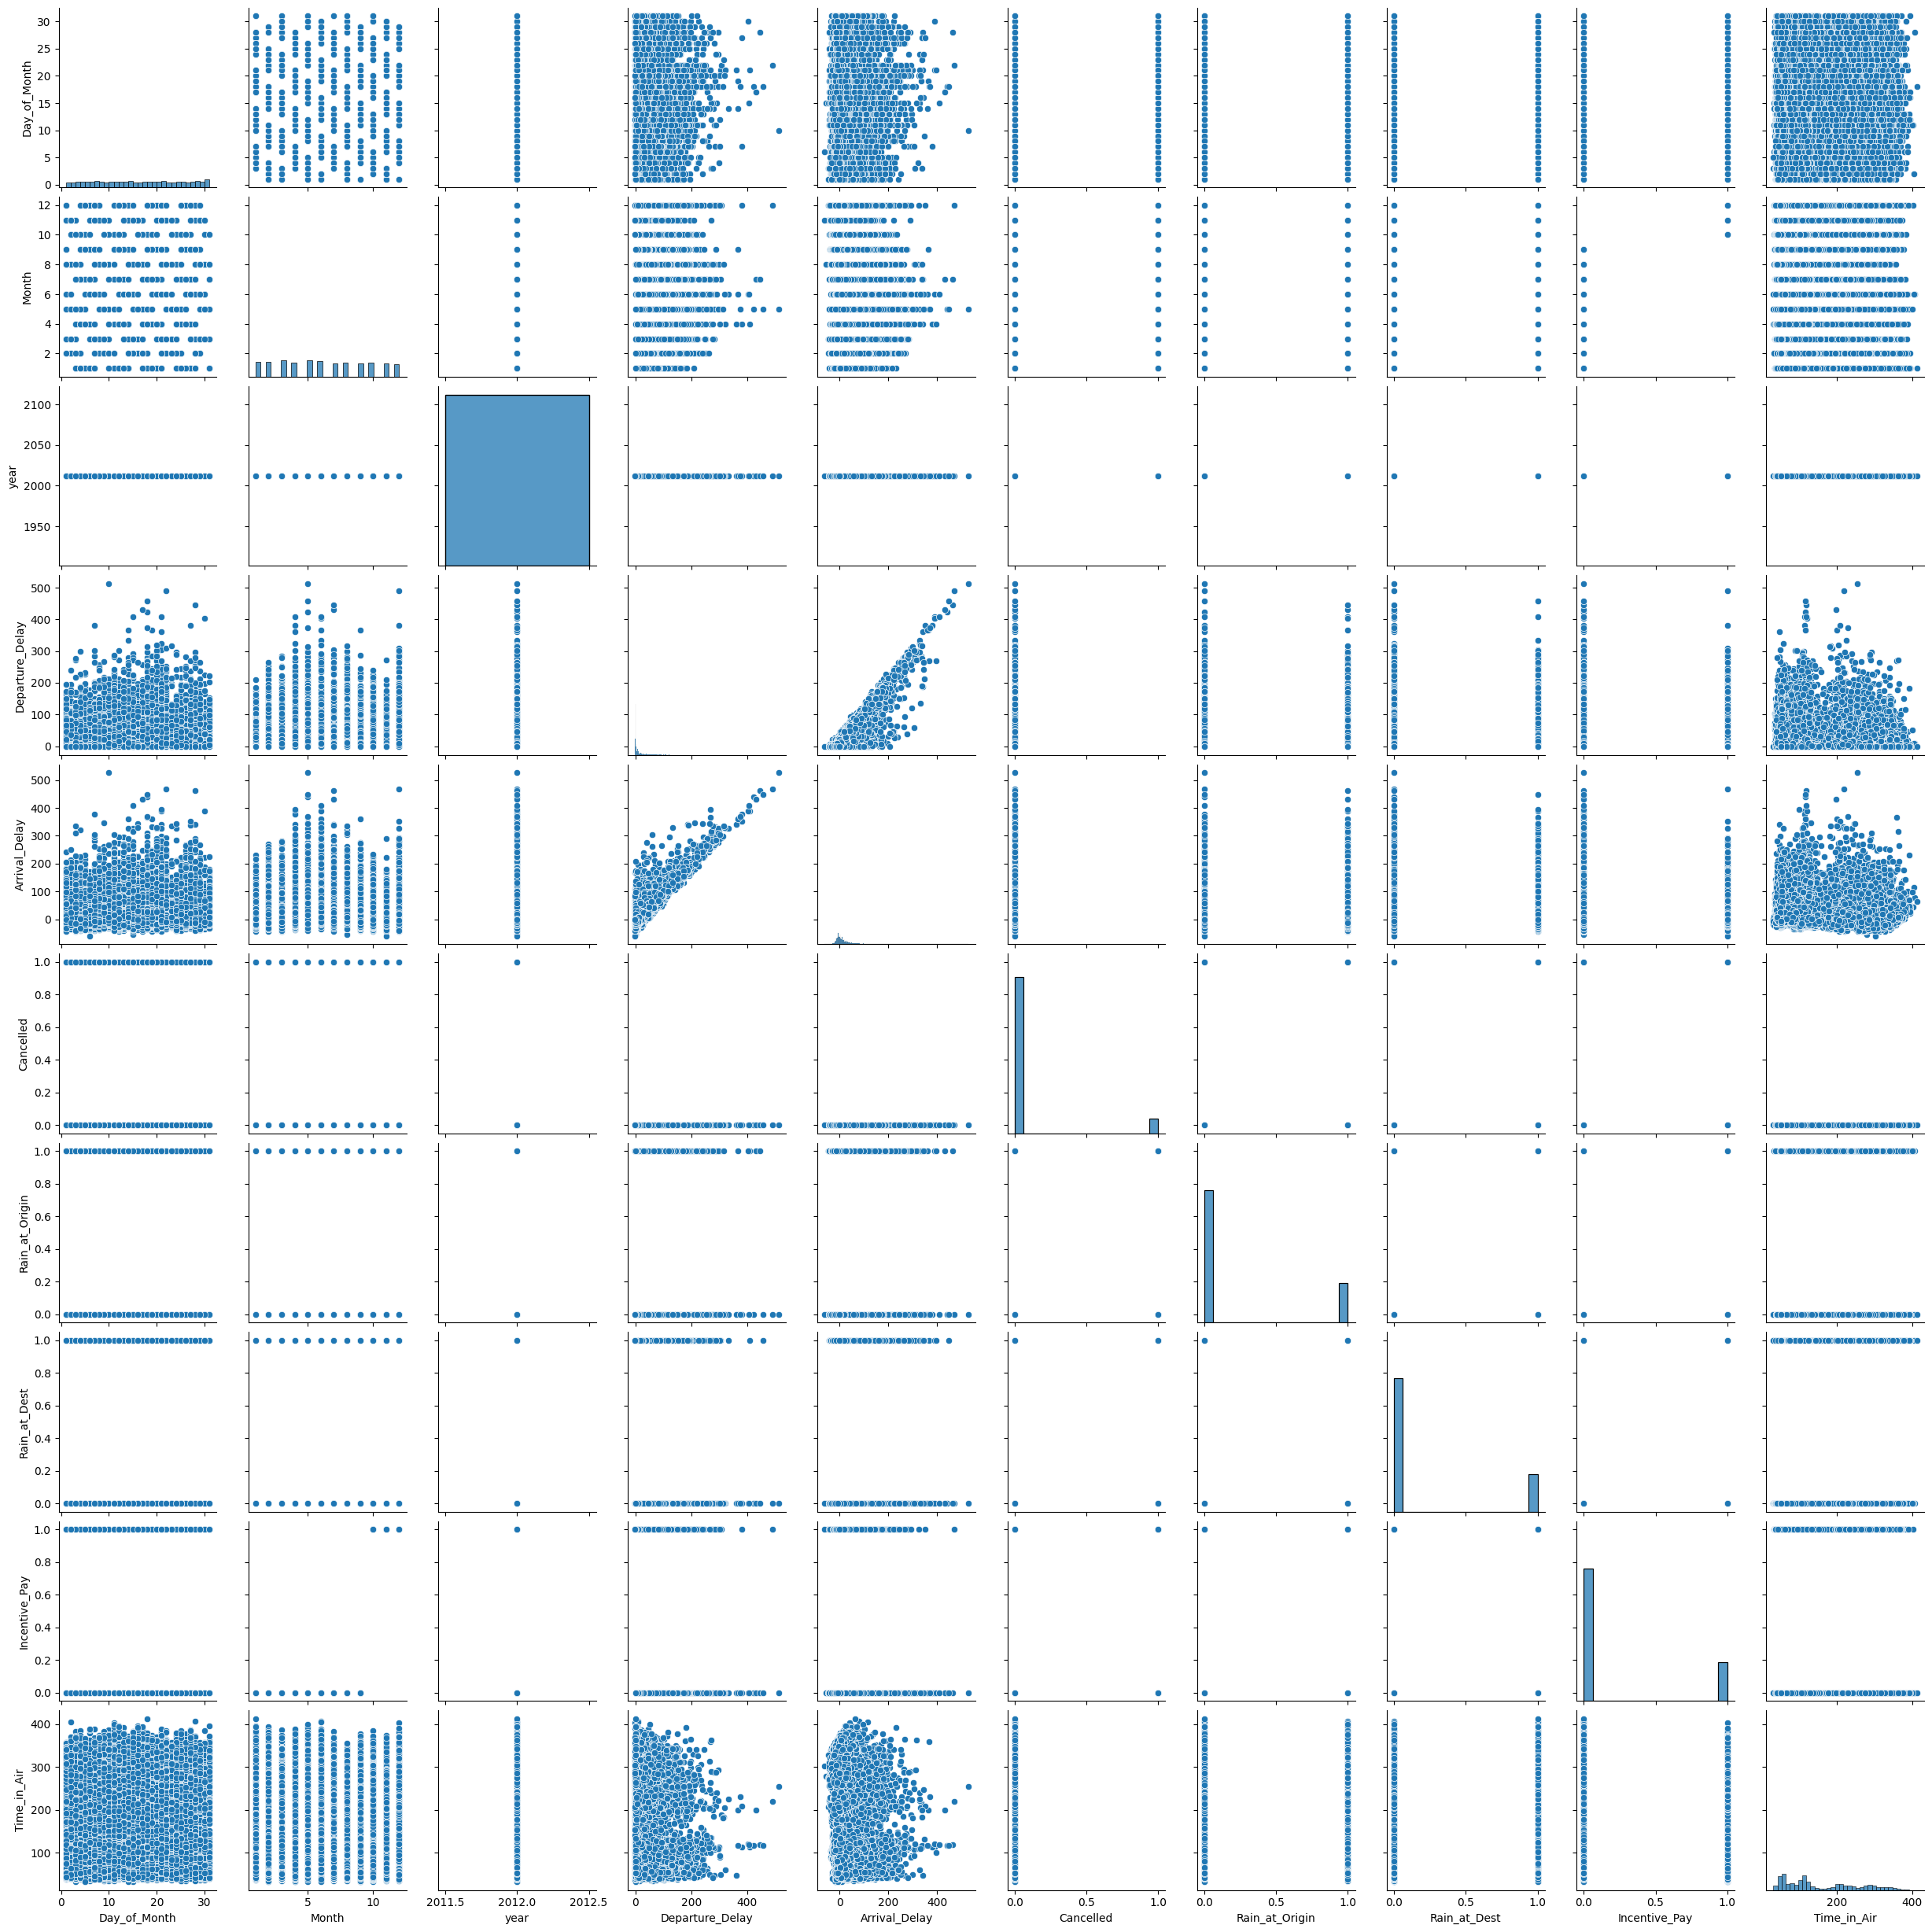

In [ ]:
# Pairplot to visualize relationships between variables
sns.pairplot(numeric_df)
plt.show()